In [1]:
#Importing required libraries
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Defining the classes using One Hot Encoder
encoder = OneHotEncoder()
encoder.fit([[1], [0]])

OneHotEncoder()

In [3]:
encoder.categories_

[array([0, 1])]

In [4]:
base_dir = r"C:\Users\shiva\Downloads\drive-download-20240416T123731Z-001"

In [5]:
#To get the class label base on class name
def label(class_label):
    if(class_label == "yes"):
        return 1
    else:
        return 0

#To clean the images by correctly resizing them and removing images with unsupported images
def clean_to_array(base_dir, class_label):
    X = []
    y = []
    l = label(class_label)
    path = os.path.join(base_dir, class_label)
    extensions = ("jpg", "jpeg", "png")
    for root, dir, files in os.walk(path):
        for file in files:
            if(file.endswith(extensions)):
                img_path = os.path.join(path, file)
                img = Image.open(img_path)
                img = img.resize((128, 128))
                img = np.array(img)
                if(img.shape == (128,128,3)):
                    X.append(img)
                    y.append(encoder.transform([[l]]).toarray()) #Also appending the respected class label to y list
    X = np.array(X) #Converting the list of images to numpy array 
    y = np.array(y) #Converting the list of labels to numpy array
    return X, y

In [6]:
X, y = clean_to_array(base_dir, "yes") #Cleaning and reshaping the images of yes folder and returning image array to X, labels to y

In [7]:
X2, y2 = clean_to_array(base_dir, "no") #Cleaning and reshaping the images of yes folder and returning image array to X2, labels to y2

In [8]:
X = np.vstack((X, X2)) #Vertically stacking the images containg tumor and images not containing tumor to X variable

In [10]:
y = np.vstack((y, y2)) #Vertically stacking the class labels of respected images
y = y.reshape(2900, 2) #Reshaping the label array to 2D numpy array

In [11]:
print("Shape of X is ",  X.shape)
print("Shape of y is ", y.shape)

Shape of X is  (2900, 128, 128, 3)
Shape of y is  (2900, 2)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
print("Shape of X_train" , X_train.shape)
print("Shape of y_train",  y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (2320, 128, 128, 3)
Shape of y_train (2320, 2)
Shape of X_test (580, 128, 128, 3)
Shape of y_test (580, 2)


In [13]:
input_shape = (128, 128, 3) #Defining input shape of the images

In [14]:
#Model building
model=Sequential()
model.add(Conv2D(32, kernel_size=(2,2), input_shape= input_shape, padding='Same'))
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
#Compiling the model
model.compile(loss= 'categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [16]:
#Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

In [25]:
#Training the model and storing the train data in history object
history = model.fit(X_train, y_train, batch_size= 128, epochs = 10, verbose = 1,  validation_split=0.2)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9437 - loss: 0.1009 - val_accuracy: 0.9375 - val_loss: 0.5302
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9569 - loss: 0.0722 - val_accuracy: 0.9504 - val_loss: 0.2256
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9534 - loss: 0.0838 - val_accuracy: 0.9246 - val_loss: 0.5509
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9532 - loss: 0.0868 - val_accuracy: 0.9267 - val_loss: 1.0168
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9522 - loss: 0.0714 - val_accuracy: 0.9289 - val_loss: 1.0019
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9477 - loss: 0.0736 - val_accuracy: 0.9526 - val_loss: 0.2961
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9583 - loss: 0.0766 - val_accuracy: 0.9310 - val_loss: 0.4972
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9628 - loss: 0.0622 - val_accuracy: 0.9483 - val_loss:

In [33]:
#Accuracy of model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Model Loss: %0.2f, accuracy: %0.2f' %((loss), (accuracy*100)))
print("Evaluate model on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9304 - loss: 1.4921
Model Loss: 0.99, accuracy: 92.76
Evaluate model on test data
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.9279 - loss: 1.4107
test loss, test acc: [0.9924972057342529, 0.9275861978530884]


In [29]:
#Funtion to plot the loss and accuracy graph
def plot_metrics(history):
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [30]:
#Defining the history object
hist_obj = history.history

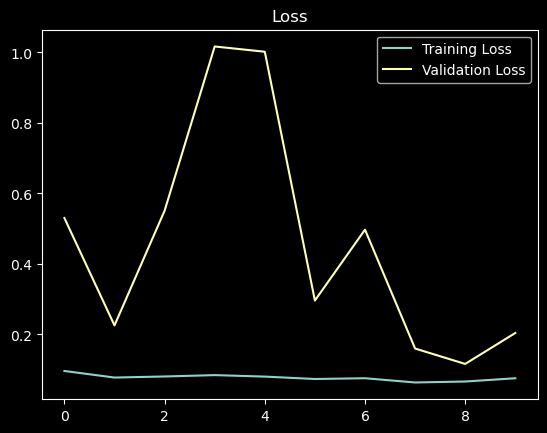

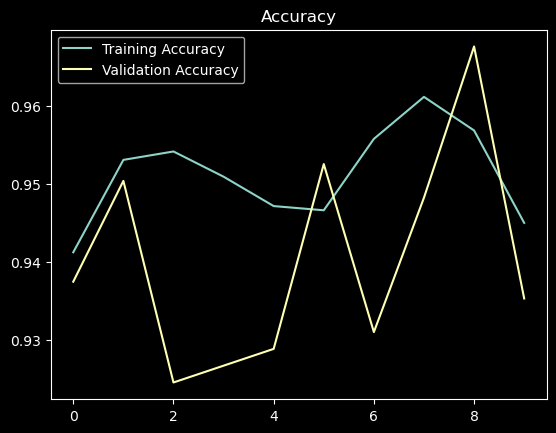

In [31]:
#Plotting graphs
plot_metrics(hist_obj)

In [56]:
#Testing the result by using a sample
path = os.path.join(base_dir, "pred")
img = Image.open(os.path.join(path, "pred46.jpg"))
img = img.resize((128, 128))

img = np.array(img)

img = np.reshape(img, (1, 128, 128, 3))
print(img.shape)
prediction = model.predict(img)

print(prediction)

if prediction[0][0] > prediction[0][1]:
    print(f"No tumor with the accuracy of {prediction[0][0]*100:.2f}%")
else:
    print(f"yes tumor with accuracy of {prediction[0][1]*100:.2f}%")


(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.99999994 0.04269209]]
No tumor with the accuracy of 100.00%
